In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
# Reading the data:
cc_df=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [4]:
cc_df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
# No null values in the data set

# Visualize the data

<AxesSubplot:>

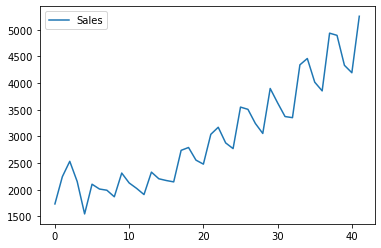

In [7]:
cc_df.plot()

In [8]:
# The plot has linear trend and multiplicative seasonality

# Splitting the data:

In [9]:
train=cc_df.head(40)
test=cc_df.tail(2)

In [10]:
train.tail()

,Quarter,Sales
35,Q4_94,4017.0
36,Q1_95,3854.0
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0


# Moving Average

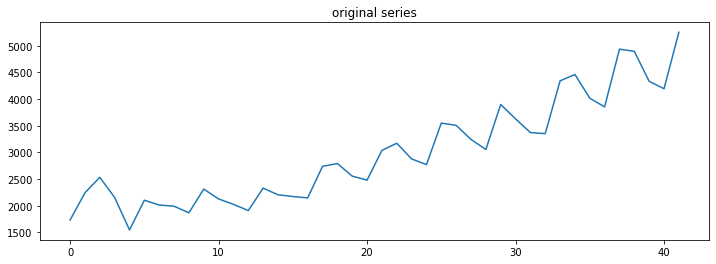

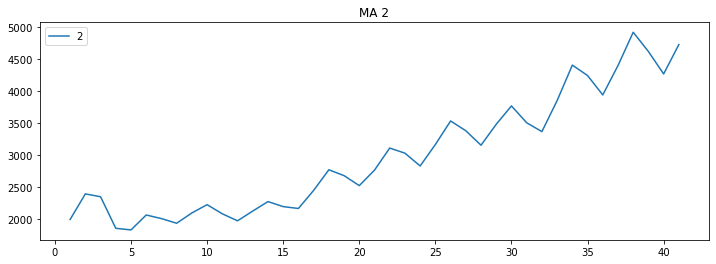

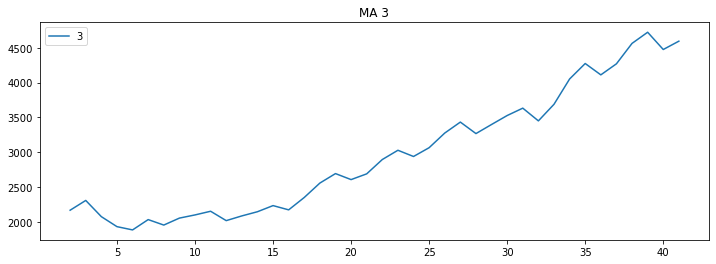

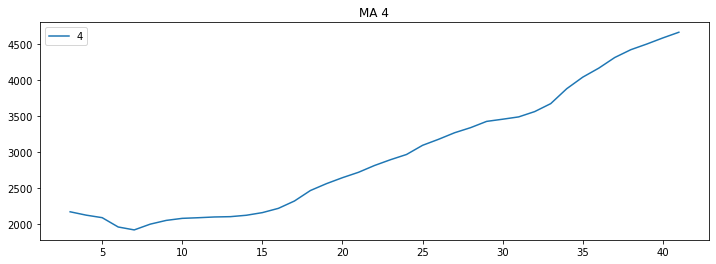

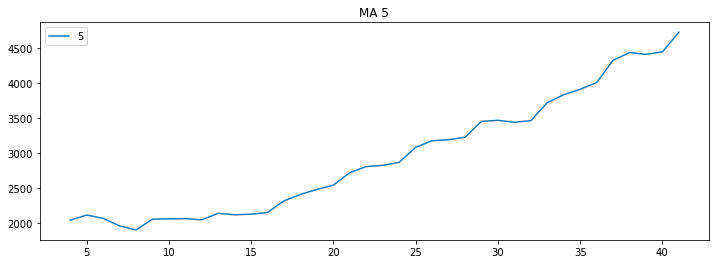

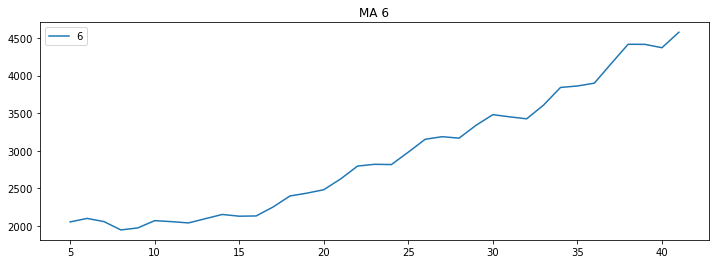

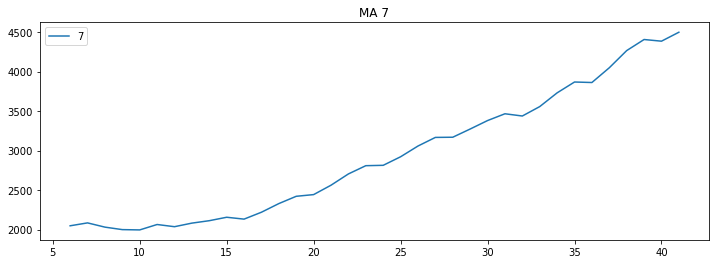

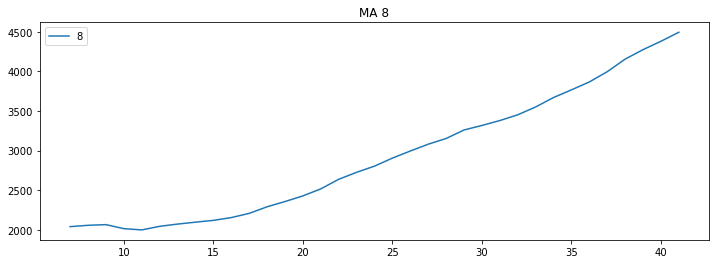

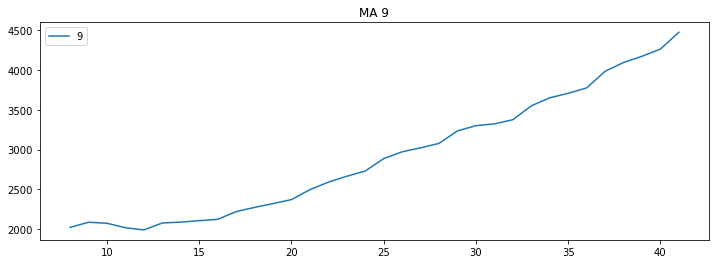

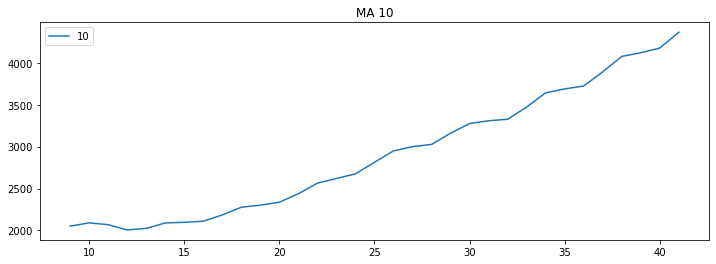

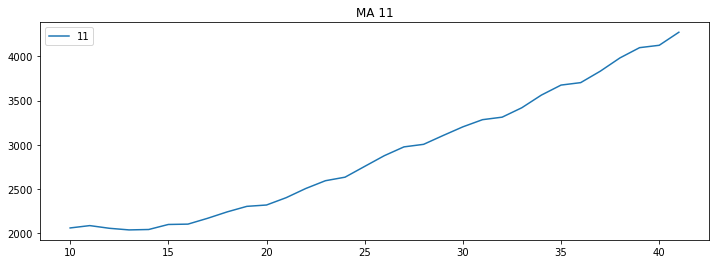

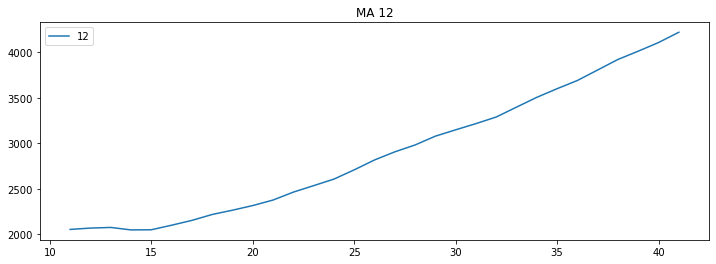

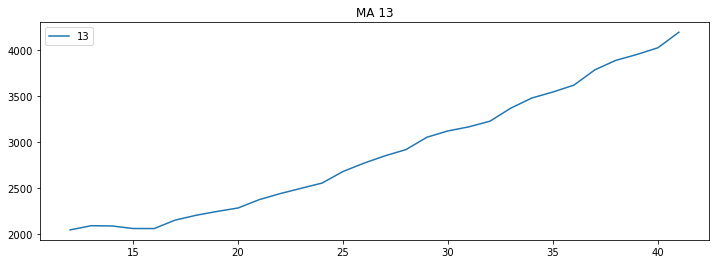

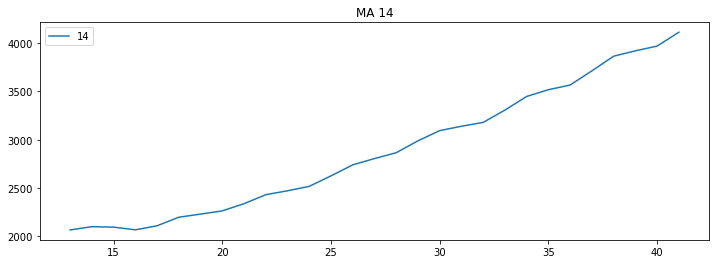

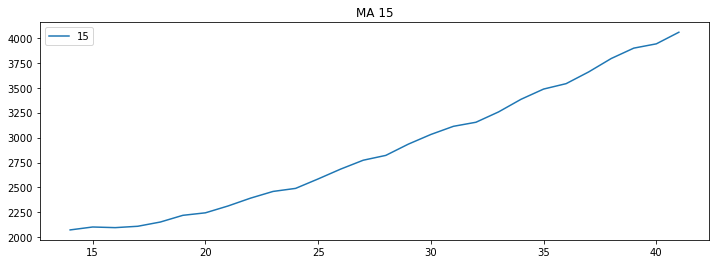

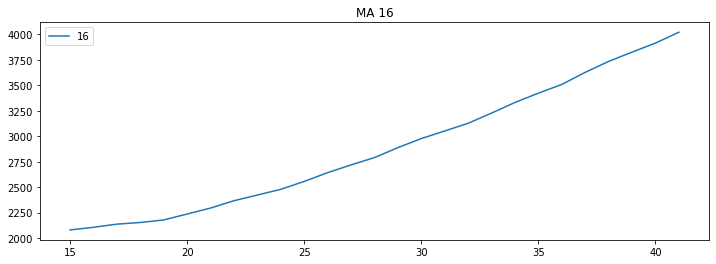

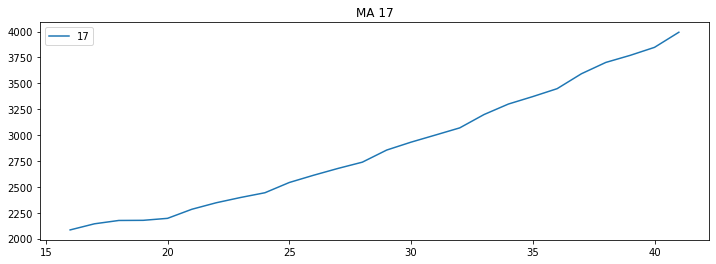

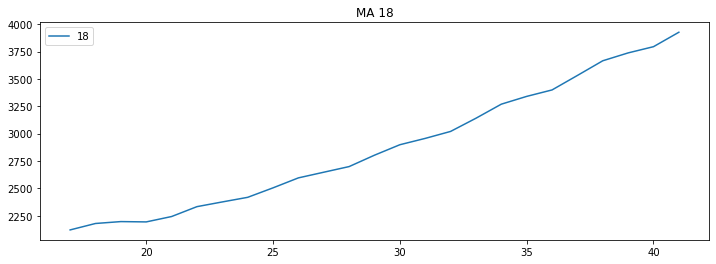

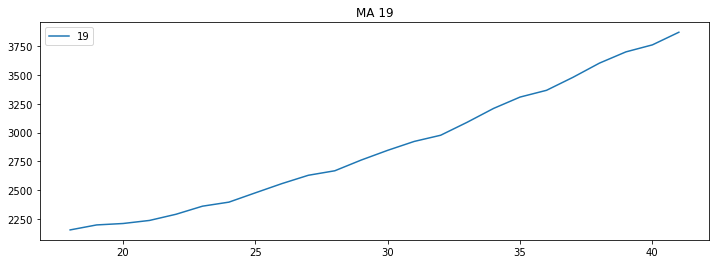

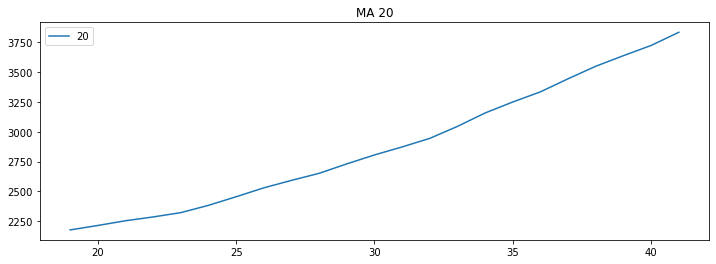

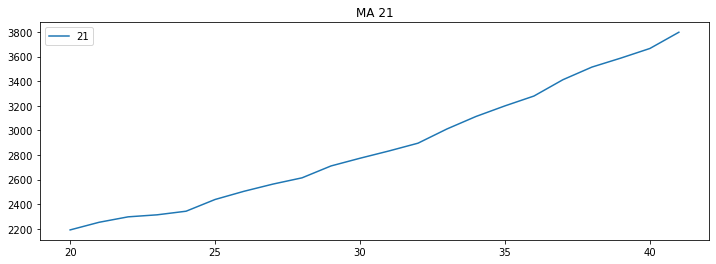

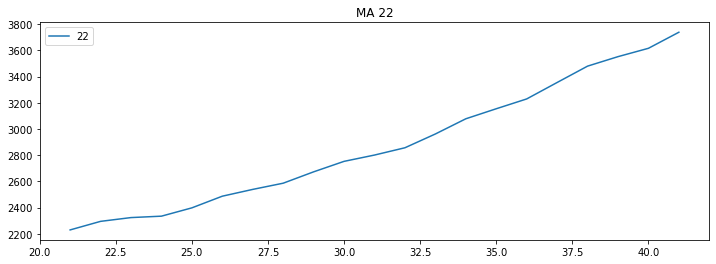

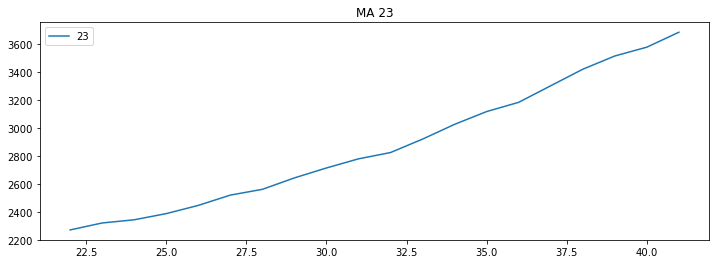

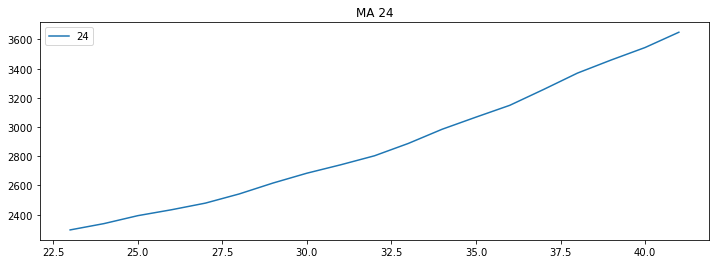

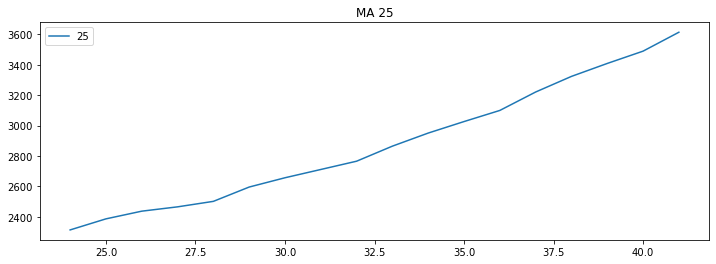

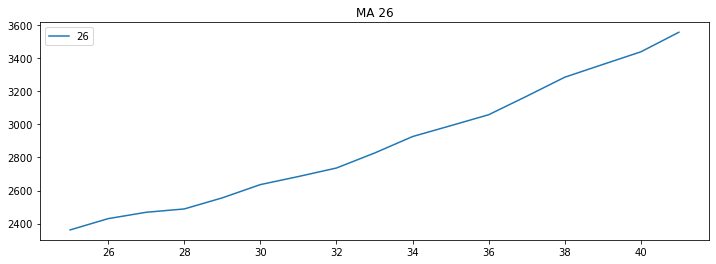

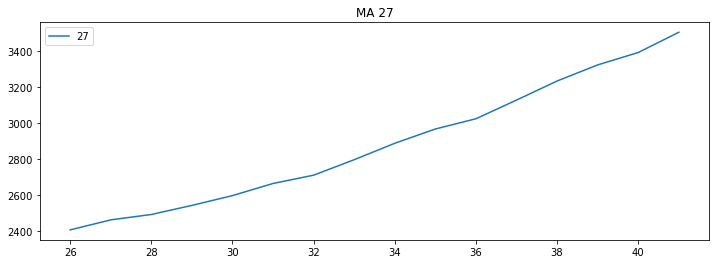

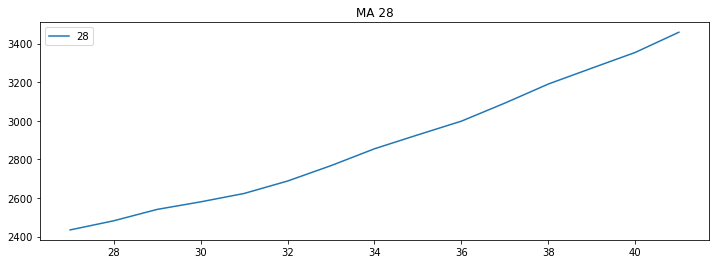

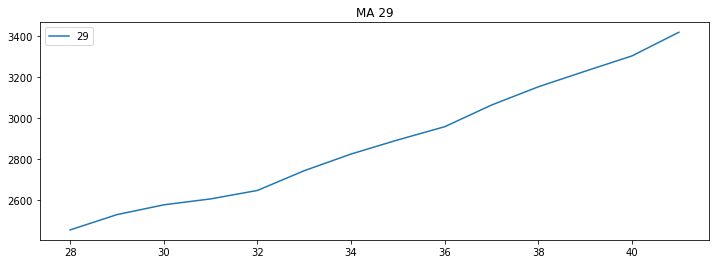

In [11]:
plt.figure(figsize=(12,4))
cc_df.Sales.plot(label="org")
plt.title("original series")

for i in range(2,30):
    plt.figure(figsize=(12,4))


    cc_df["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

In [12]:
# MA with 4 ,8 ,12 were having smooth curves

# Time Series Decomposition plot :

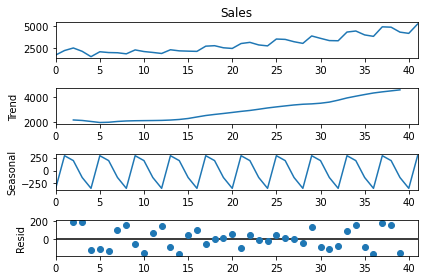

In [13]:
decompose_ts_add = seasonal_decompose(cc_df.Sales,period=4)
decompose_ts_add.plot()
plt.show()

In [14]:
# We got linear trend in the decomposition plots

# ACF and PACF Plots

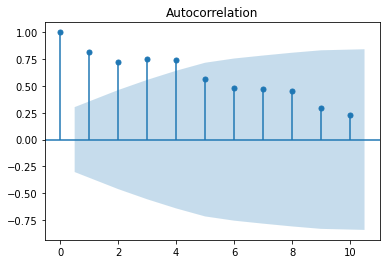

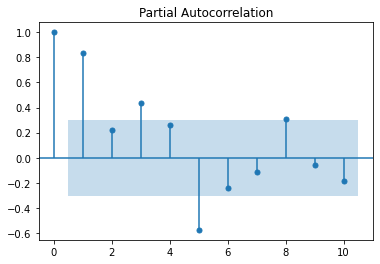

In [15]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(cc_df.Sales,lags=10)
tsa_plots.plot_pacf(cc_df.Sales,lags=10)
plt.show()

# Data Driven Models:

In [16]:
# error calculation :

def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# 1. Simple Exponential Method:

In [17]:
ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Sales) 


10.14942500502269

In [18]:
# Using different smoothing levels :

import numpy as np
x=np.arange(0.1,1,0.9/10)
for i in x :
    ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
    score=MAPE(pred_ses,test.Sales) 
    print("smoothing_level ",i,"-->","MAPE Error",score)


smoothing_level  0.1 --> MAPE Error 19.11929803516117
smoothing_level  0.19 --> MAPE Error 10.083958846995754
smoothing_level  0.28 --> MAPE Error 10.511173415126196
smoothing_level  0.37 --> MAPE Error 10.71636995103869
smoothing_level  0.45999999999999996 --> MAPE Error 10.808201965990701
smoothing_level  0.5499999999999999 --> MAPE Error 10.829831641976531
smoothing_level  0.64 --> MAPE Error 10.8023542718706
smoothing_level  0.73 --> MAPE Error 10.737983159109124
smoothing_level  0.82 --> MAPE Error 10.645775635864085
smoothing_level  0.9099999999999999 --> MAPE Error 10.534529313970765


In [19]:
# MAPE is least for : smoothing_level  0.19 --> MAPE Error 10.083958846995754

# Hole Method:

In [20]:
# Holt method 
hw_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Sales) 

10.338134034231498

In [21]:
# Using different smoothing levels and smoothing slopes:

import numpy as np
alphas=np.arange(0.1,1,0.9/10)
betas=np.arange(0.1,1,0.9/10)

for i in alphas :
    for j in betas:
        hw_model = Holt(train["Sales"]).fit(smoothing_level=i, smoothing_slope=j)
        pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
        score=MAPE(pred_hw,test.Sales)
        print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)


smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 9.87815004287964
smoothing_level  0.1  smoothing_slope 0.19 --> MAPE Error 10.099488911239753
smoothing_level  0.1  smoothing_slope 0.28 --> MAPE Error 10.293723230083213
smoothing_level  0.1  smoothing_slope 0.37 --> MAPE Error 10.345811233527401
smoothing_level  0.1  smoothing_slope 0.45999999999999996 --> MAPE Error 10.290964586264296
smoothing_level  0.1  smoothing_slope 0.5499999999999999 --> MAPE Error 10.185939861550729
smoothing_level  0.1  smoothing_slope 0.64 --> MAPE Error 10.078118130914222
smoothing_level  0.1  smoothing_slope 0.73 --> MAPE Error 9.996765938553072
smoothing_level  0.1  smoothing_slope 0.82 --> MAPE Error 9.951786342684244
smoothing_level  0.1  smoothing_slope 0.9099999999999999 --> MAPE Error 9.93943157085209
smoothing_level  0.19  smoothing_slope 0.1 --> MAPE Error 10.250306370679976
smoothing_level  0.19  smoothing_slope 0.19 --> MAPE Error 10.325139844314037
smoothing_level  0.19  smoothing_slope 

In [22]:
# MAPE value is least for : smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 9.87815004287964

# Triple Exponential Methods:

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [23]:
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Sales)

0.41139234317596024

### Holts winter exponential smoothing with additive seasonality and additive trend

In [24]:
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Sales)

3.323182959106586

### Conclusion: We got the Least MAPE value for additive trend and multiplicative seasonality

# Final Model:

In [25]:
final_model = ExponentialSmoothing(cc_df["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
cc_df['Pred_Sales'] = final_model.predict(start = cc_df.index[0],end = cc_df.index[-1])


In [26]:
#Forecasting for next 10 time periods
final_model.forecast(10)

42    4921.508206
43    4587.981568
44    4532.396905
45    5757.236098
46    5816.204292
47    5208.816817
48    4956.798219
49    6238.133359
50    6082.762325
51    5456.325558
dtype: float64

In [27]:
cc_df.head()

,Quarter,Sales,Pred_Sales
0,Q1_86,1734.827000,1884.531505
1,Q2_86,2244.960999,2234.283049
2,Q3_86,2533.804993,2556.117788
3,Q4_86,2154.962997,2208.862091
4,Q1_87,1547.818996,1783.850292


<AxesSubplot:>

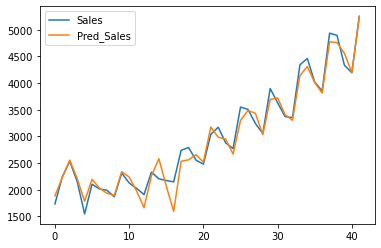

In [28]:
cc_df.plot()